In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import operator
from matplotlib import pyplot as plt
from repositories.CorpusRepository import *
from repositories.TokenRepository import *
from repositories.EstadisticasRepository import *

path = 'corpus'
corpusRepository = CorpusRepository(path)
tokenRepository = TokenRepository()
pathVacias = None

documentos = corpusRepository.getListDocuments()


100% ▏██████████████████████████████████████████████████▕

262247 11264
262246 11264
262245 11264
262244 11263
262243 11262
262242 11262
262241 11262


/Users/macbookpro/Desktop/ri/test-env/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


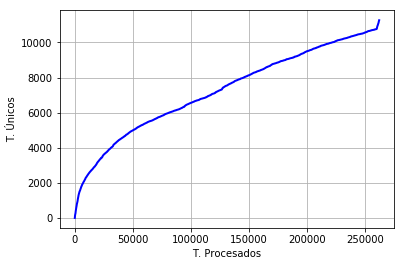

In [2]:
response = tokenRepository.tokenizar(documentos,pathVacias = pathVacias)
figura, grafico = plt.subplots()
grafico.plot(response['terminos_procesados'], response['terminos_unicos'], color="b", linewidth=2)
grafico.grid(True)
grafico.set_xlabel("T. Procesados")
grafico.set_ylabel(u"T. Únicos")
figura.show()


Se definen dos funciones: Una que estima el crecimiento del vocabulario según la ley de Heaps y otra que grafica varias estimaciones en el mismo gráfico para compararlas con medición real.

In [3]:
def calcular_estimacion_heaps(terminos_procesados, param_k, param_b):
    terminos_unicos = []
    for cantidad_procesada in terminos_procesados:
        terminos_unicos.append(param_k * pow(cantidad_procesada, param_b))
    return terminos_unicos

def graficar_predicciones_heaps(lista_predicciones, terminos_procesados, terminos_unicos, colores):
    figura, grafico = plt.subplots()
    for indice, prediccion in enumerate(lista_predicciones):
        grafico.plot(terminos_procesados, prediccion[2], color=colores[indice], linewidth=1, linestyle="--",
                     label="k: "+str(prediccion[0])+" | b: "+str(prediccion[1]))
    grafico.plot(terminos_procesados, terminos_unicos, color="b", linewidth=1, label="Real")
    grafico.legend(loc="upper left")
    grafico.grid(True)
    grafico.set_xlabel("T. Procesados")
    grafico.set_ylabel(u"T. Únicos")
    figura.show()

Se establecen los parámetros de Heaps a evaluar y se realizan las estimaciones y gráficos correspondientes.

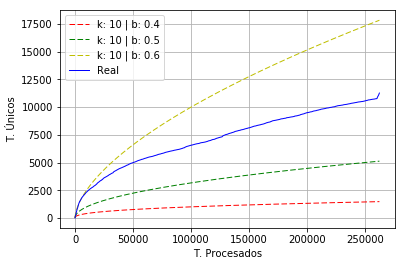

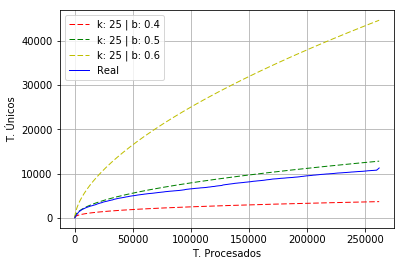

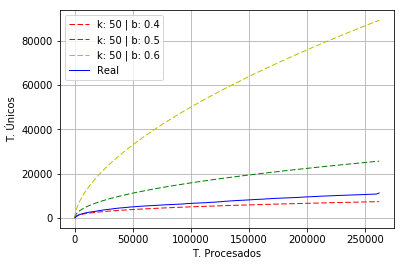

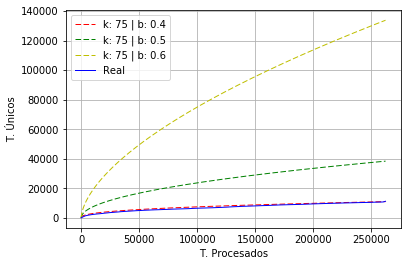

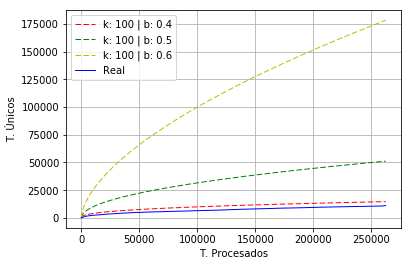

In [4]:
params_k = [10, 25, 50, 75, 100]
params_b = [0.4, 0.5, 0.6]

colores = ["r","g","y"]

for param_k in params_k:
    lista_predicciones_heaps = []
    for param_b in params_b:
        lista_predicciones_heaps.append([param_k, param_b, calcular_estimacion_heaps(response['terminos_procesados'], param_k, param_b)])
    graficar_predicciones_heaps(lista_predicciones_heaps, response['terminos_procesados'], response['terminos_unicos'], colores)

De todas las estimaciones graficadas, la que mas se asemeja a los datos obtenidos del análisis es la que tiene como parámetros k = 70 y b = 0,4